In [5]:
import numpy as np

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "hw1"

import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 
    
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')
    
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

Figure directory exists.


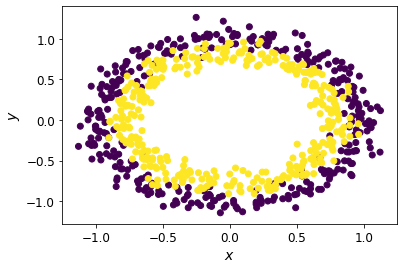

In [6]:
from sklearn.datasets import make_circles
x,y=make_circles(n_samples= 700,shuffle=False,noise=.08,random_state=42)

plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [7]:
n_train=600
n_valid=100
permutation=np.random.permutation(700)
x_permute=x[permutation]
y_permute=y[permutation]
x_train=x_permute[:n_train]
x_valid=x_permute[n_train:]
y_train=y_permute[:n_train]
y_valid=y_permute[n_train:]

logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

logistic_err = round(1-logistic_model.score(x_valid, y_valid), 3)
print("logistic validation error is " + str(logistic_err))

logistic validation error is 0.55


/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
best_accuracy = 0
k_best = 1
for k in range(1, 30):
    knn_model=KNeighborsClassifier(k)
    knn_model.fit(x_train,y_train)
    cur_score = knn_model.score(x_valid, y_valid)
    
    if  cur_score > best_accuracy :
        best_accuracy = cur_score
        k_best = k
best_valid_error = round(1-best_accuracy, 3)
print( "the best KNN validation error is " + str(best_valid_error) + " (when k = " + str(k_best) + ")")

the best KNN validation error is 0.05 (when k = 11)


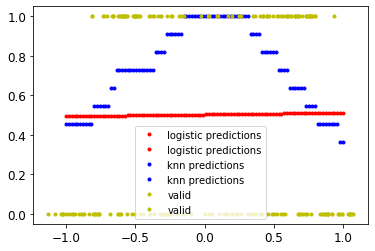

I prefer knn model in this case for lower validation error, therefore higher accuracy


In [25]:
knn_model=KNeighborsClassifier(k_best)
knn_model.fit(x_valid, y_valid)
x_interpolate = np.linspace(-1,1,num=100)
x_interpolate = x_interpolate.reshape(-1,2)

plt.plot(x_interpolate, logistic_model.predict_proba(x_interpolate)[:,1], 'r.', label='logistic predictions')
plt.plot(x_interpolate, knn_model.predict_proba(x_interpolate)[:,1], 'b.', label = 'knn predictions')
plt.plot(x_valid,y_valid,'y.',label='valid')
plt.legend()
plt.show()
print("I prefer knn model in this case for lower validation error, therefore higher accuracy")